In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("./data_web.csv")

In [7]:
df.sort_values(by="DATE")

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
1353,1353,https://www.millenaire3.com/ressources/en-pass...,En passant par le centre : la rue de la Républ...,17077,Étude,"Au plus fort des débats sur la ""dégradation"" d...",Sommaire Chapitre I : De la flânerie1. Qui va...,01/01/1990
1625,1625,https://www.millenaire3.com/ressources/lyon-to...,Lyon / Topographie d’une mémoire chrétienne,31680,Texte,Synthèse du texte publié en janvier 1987 par G...,Le texte porte sur la personnalité religieuse ...,01/01/1998
110,110,https://www.millenaire3.com/ressources/Le-viei...,Le vieillissement de la population interroge l...,50049,Texte,Les pays d’Europe et leurs citoyens ne sont pa...,Qu’est-ce que la vieillesse ? Quelles question...,01/01/1998
1341,1341,https://www.millenaire3.com/ressources/les-pay...,Les pays industrialisés s’engagent à réduire l...,47670,Texte,NaN,Le compromis trouvé à l’issue de la conférence...,01/01/1998
364,364,https://www.millenaire3.com/ressources/formati...,Formation en alternance : où en est-on dans la...,36945,Texte,NaN,"Cette étude faite à la demande du Grand Lyon, ...",01/01/1998
...,...,...,...,...,...,...,...,...
1682,1682,https://www.millenaire3.com/ressources/La-vill...,La ville intelligente : modèles et finalités,41844,Étude,Si les villes sont aujourd’hui le lieu où vive...,"De fait, la première « révolution urbaine », ...",31/10/2014
1403,1403,https://www.millenaire3.com/ressources/La-conc...,La concertation dans la conduite de projet : G...,481492,Étude,Ce guide méthodologique a été conçu comme un o...,Sommaire : Edito / PréambulePartie 1 : Les fon...,31/12/2007
1759,1759,https://www.millenaire3.com/dossiers/VILLE-ET-...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
35,35,https://www.millenaire3.com/dossiers/2011/vill...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010


In [23]:
df.DATE = pd.to_datetime(df.DATE)

<AxesSubplot:>

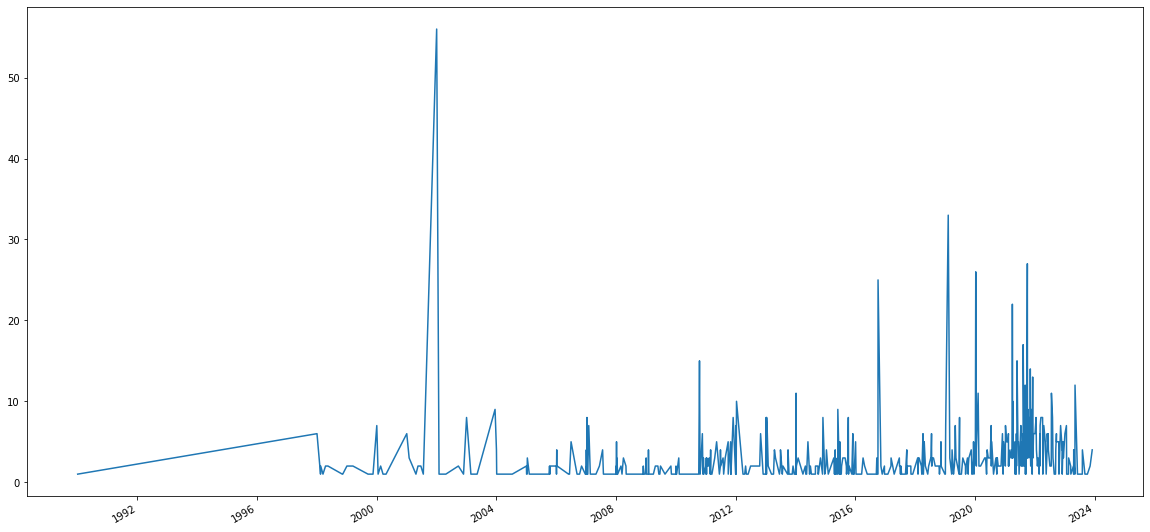

In [31]:
df.DATE.value_counts().plot(figsize=(20,10))

<AxesSubplot:>

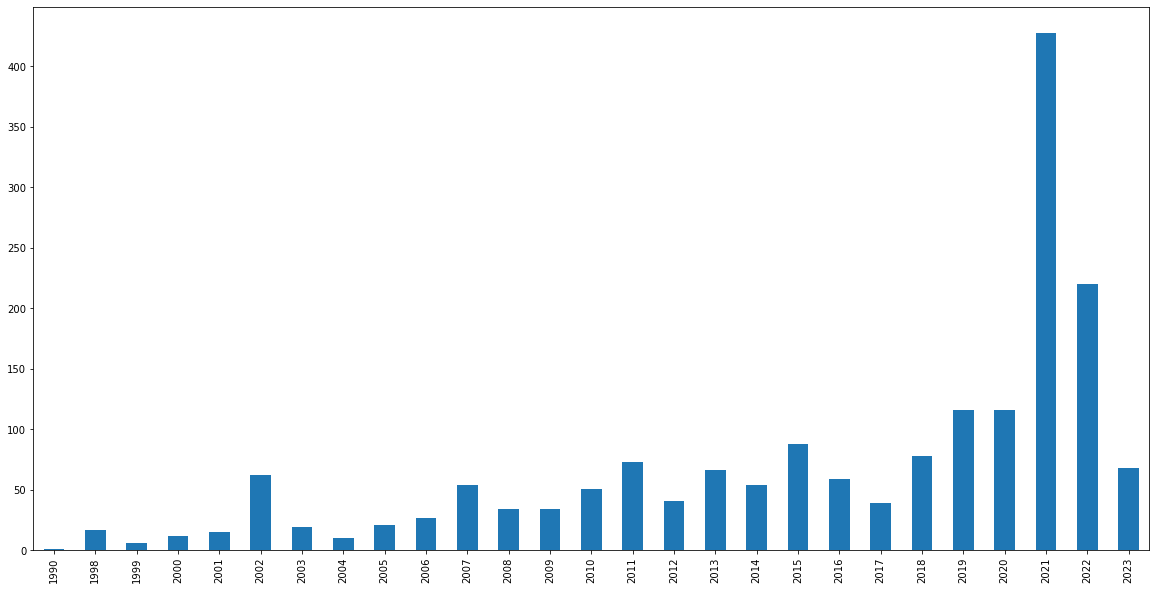

In [73]:
tmp = [date.date().year for date in df.DATE]
tmp = pd.DataFrame({"DATE" : tmp})
tmp.DATE.value_counts().sort_index().plot(kind = "bar", figsize=(20, 10))

### TEXTE


In [90]:

errors = []
for i, item in enumerate(df.RESUME):
    if type(item) != str:
        errors.append(df.URL[i])

print(len(errors))
for i, item in enumerate(errors): 
    print(i, item)

123
0 https://www.millenaire3.com/ressources/vivre-et-imaginer-la-ville-entre-cite-et-metropole
1 https://www.millenaire3.com/ressources/l-integration-de-l-animal-familier-au-sein-des-institutions-pour-personnes-agees
2 https://www.millenaire3.com/ressources/diversite-culturelle-religion-et-modernite-l-experience-de-la-france-contemporaine
3 https://www.millenaire3.com/ressources/les-tsiganes-de-hongrie-et-les-politiques-d-integration
4 https://www.millenaire3.com/ressources/forces-spirituelles-une-dette-a-l-egard-de-l-humanite
5 https://www.millenaire3.com/ressources/vers-un-developpement-durable-de-qualite-a-quelles-conditions-peut-on-agir
6 https://www.millenaire3.com/ressources/consultation-sur-la-condition-penitentiaire
7 https://www.millenaire3.com/ressources/la-situation-des-personnes-agees-immigrees-dans-le-contexte-urbain-suisse-l-exemple-de-geneve
8 https://www.millenaire3.com/ressources/lyon-2020-synthese-du-groupe-de-travail-sur-la-scene-artistique-de-la-metropole-lyonnaise

In [93]:
concat = []
for i, item in enumerate(df.RESUME):
    if type(item) == str:
        concat.append(item.replace("\n", " "))
txt = "".join(concat)

In [97]:
import spacy
nlp = spacy.load()

OSError: [E050] Can't find model 'Fr-fr'. It doesn't seem to be a Python package or a valid path to a data directory.